In [1]:
pip install pandas plotly dash openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [20]:
import pandas as pd

from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file

df = pd.read_csv('Ecommerce_Consumer_Behavior_Analysis_Data.csv')
df.head()


Saving Ecommerce_Consumer_Behavior_Analysis_Data.csv to Ecommerce_Consumer_Behavior_Analysis_Data (3).csv


,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [24]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns



Index(['customer_id', 'age', 'gender', 'income_level', 'marital_status',
       'education_level', 'occupation', 'location', 'purchase_category',
       'purchase_amount', 'frequency_of_purchase', 'purchase_channel',
       'brand_loyalty', 'product_rating',
       'time_spent_on_product_research(hours)', 'social_media_influence',
       'discount_sensitivity', 'return_rate', 'customer_satisfaction',
       'engagement_with_ads', 'device_used_for_shopping', 'payment_method',
       'time_of_purchase', 'discount_used', 'customer_loyalty_program_member',
       'purchase_intent', 'shipping_preference', 'time_to_decision'],
      dtype='object')

In [25]:
df.describe()
df.isnull().sum()
df['customer_satisfaction'].value_counts()


,count
customer_satisfaction,
1,111
6,109
3,104
9,102
8,102
7,101
2,100
4,99
5,87


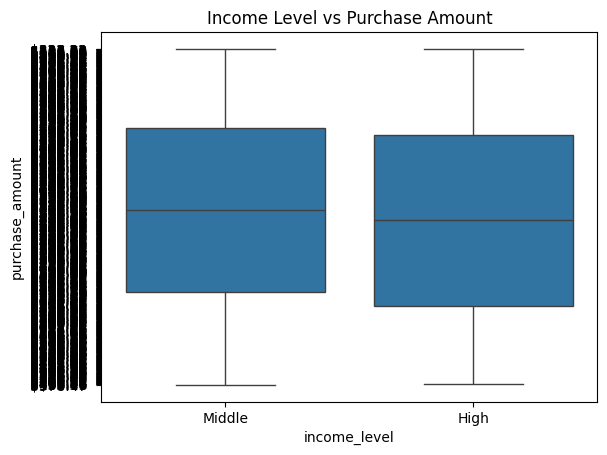

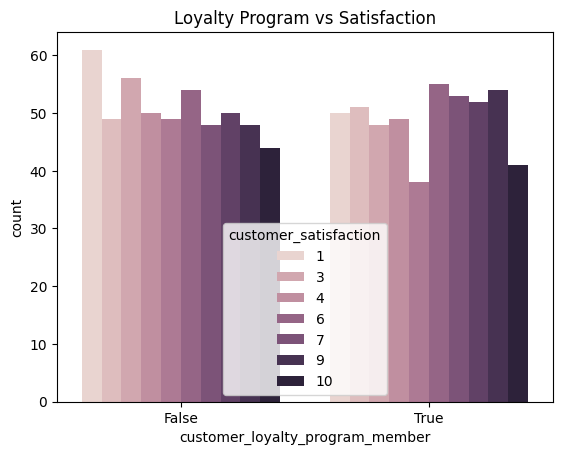

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='income_level', y='purchase_amount')
plt.title("Income Level vs Purchase Amount")
plt.show()

sns.countplot(data=df, x='customer_loyalty_program_member', hue='customer_satisfaction')
plt.title("Loyalty Program vs Satisfaction")
plt.show()



In [31]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load data
df = pd.read_csv('Ecommerce_Consumer_Behavior_Analysis_Data.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['purchase_amount'] = df['purchase_amount'].replace('[\$,]', '', regex=True)
df['purchase_amount'] = pd.to_numeric(df['purchase_amount'], errors='coerce')
df = df.dropna(subset=['purchase_amount'])

# Init app
app = dash.Dash(__name__)
app.title = "Ecommerce Customer Dashboard"

# Figures
fig1 = px.histogram(df, x='customer_satisfaction', color='income_level',
                    title="Customer Satisfaction by Income Level")

fig2 = px.box(df, x='education_level', y='purchase_amount',
              title="Education Level vs Purchase Amount")

fig3 = px.sunburst(df, path=['gender', 'occupation', 'purchase_category'],
                   values='purchase_amount', title="Purchase Breakdown")

fig4 = px.scatter(df, x='time_to_decision', y='purchase_amount',
                  color='customer_satisfaction', title="Decision Time vs Purchase")

# Layout
app.layout = html.Div([
    html.H1("📊 Ecommerce Customer Behavior Dashboard", style={'textAlign': 'center'}),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
    dcc.Graph(figure=fig3),
    dcc.Graph(figure=fig4),
])

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>